<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in City of Toronto, Canada</font></h1>
<h2 align=center><font size = 5>Applied Data Science Capstone</font></h2>

In [2]:
# importing the necessary libraries
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
import numpy as np
import requests 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

### Scrapping Data from Wikipedia

In [3]:
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page=urllib.request.urlopen(url)
soup= BeautifulSoup(page,"lxml")
all_tables=soup.find_all("table")
right_table=soup.find('table', class_='wikitable sortable')

### Transforming the Scrapped Data into a DataFrame

In [4]:
A=[]
B=[]
C=[]
for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

In [5]:
df=pd.DataFrame(A, columns=['Postal Code'])
df['Borough']=B
df['Neighborhood']=C
df=df[~df.Borough.str.contains("Not assigned")]
df.head()

Postal Code            Borough                                  Neighborhood
2        M3A
        North York
                                    Parkwoods

3        M4A
        North York
                             Victoria Village

4        M5A
  Downtown Toronto
                    Regent Park, Harbourfront

5        M6A
        North York
             Lawrence Manor, Lawrence Heights

6        M7A
  Downtown Toronto
  Queen's Park, Ontario Provincial Government

In [6]:
df['Neighborhood'] = df['Neighborhood'].astype(str)
dr = df.groupby(['Postal Code', 'Borough'])['Neighborhood'].agg( ','.join).reset_index()
dr['Neighborhood']=dr['Neighborhood'].astype(str).map(lambda x: x.rstrip('\n'))
dr['Neighborhood'][dr['Borough']=='Not assigned\n'] = dr['Borough']
dr

Postal Code            Borough  \
0          M1B
       Scarborough
   
1          M1C
       Scarborough
   
2          M1E
       Scarborough
   
3          M1G
       Scarborough
   
4          M1H
       Scarborough
   
5          M1J
       Scarborough
   
6          M1K
       Scarborough
   
7          M1L
       Scarborough
   
8          M1M
       Scarborough
   
9          M1N
       Scarborough
   
10         M1P
       Scarborough
   
11         M1R
       Scarborough
   
12         M1S
       Scarborough
   
13         M1T
       Scarborough
   
14         M1V
       Scarborough
   
15         M1W
       Scarborough
   
16         M1X
       Scarborough
   
17         M2H
        North York
   
18         M2J
        North York
   
19         M2K
        North York
   
20         M2L
        North York
   
21         M2M
        North York
   
22         M2N
        North York
   
23         M2P
        North York
   
24         M2R
        North York
   
25         M3A
        North York
   
26         M3B
        North York
   
27         M3C
        North York
   
28         M3H
        North York
   
29         M3J
        North York
   
..          ...                ...   
73         M6C
              York
   
74         M6E
              York
   
75         M6G
  Downtown Toronto
   
76         M6H
      West Toronto
   
77         M6J
      West Toronto
   
78         M6K
      West Toronto
   
79         M6L
        North York
   
80         M6M
              York
   
81         M6N
              York
   
82         M6P
      West Toronto
   
83         M6R
      West Toronto
   
84         M6S
      West Toronto
   
85         M7A
  Downtown Toronto
   
86         M7R
       Mississauga
   
87         M7Y
      East Toronto
   
88         M8V
         Etobicoke
   
89         M8W
         Etobicoke
   
90         M8X
         Etobicoke
   
91         M8Y
         Etobicoke
   
92         M8Z
         Etobicoke
   
93         M9A
         Etobicoke
   
94         M9B
         Etobicoke
   
95         M9C
         Etobicoke
   
96         M9L
        North York
   
97         M9M
        North York
   
98         M9N
              York
   
99         M9P
         Etobicoke
   
100        M9R
         Etobicoke
   
101        M9V
         Etobicoke
   
102        M9W
         Etobicoke
   

                                          Neighborhood  
0                                       Malvern, Rouge  
1               Rouge Hill, Port Union, Highland Creek  
2                    Guildwood, Morningside, West Hill  
3                                               Woburn  
4                                            Cedarbrae  
5                                  Scarborough Village  
6          Kennedy Park, Ionview, East Birchmount Park  
7                      Golden Mile, Clairlea, Oakridge  
8      Cliffside, Cliffcrest, Scarborough Village West  
9                          Birch Cliff, Cliffside West  
10   Dorset Park, Wexford Heights, Scarborough Town...  
11                                   Wexford, Maryvale  
12                                           Agincourt  
13             Clarks Corners, Tam O'Shanter, Sullivan  
14   Milliken, Agincourt North, Steeles East, L'Amo...  
15                       Steeles West, L'Amoreaux West  
16                                         Upper Rouge  
17                                   Hillcrest Village  
18                        Fairview, Henry Farm, Oriole  
19                                     Bayview Village  
20                            York Mills, Silver Hills  
21                             Willowdale, Newtonbrook  
22                         Willowdale, Willowdale East  
23                                     York Mills West  
24                         Willowdale, Willowdale West  
25                                           Parkwoods  
26                                           Don Mills  
27                                           Don Mi

In [7]:
dr.shape

(103, 3)

In [8]:
dr['Postal Code']= dr['Postal Code'].astype(str).map(lambda x: x.rstrip('\n'))

In [9]:
!wget -O Geospatial_data.csv http://cocl.us/Geospatial_data
dx=pd.read_csv("Geospatial_data.csv")
dx.head()

--2020-06-27 14:42:41--  http://cocl.us/Geospatial_data
Resolving cocl.us (cocl.us)... 159.8.69.24, 159.8.69.21, 159.8.72.228
Connecting to cocl.us (cocl.us)|159.8.69.24|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cocl.us/Geospatial_data [following]
--2020-06-27 14:42:41--  https://cocl.us/Geospatial_data
Connecting to cocl.us (cocl.us)|159.8.69.24|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-06-27 14:42:42--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.29.197
Connecting to ibm.box.com (ibm.box.com)|107.152.29.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-06-27 14:42:42--  https://ibm.box.com/public/static/9a

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [10]:
result = pd.merge(dr,dx, how='left', on=['Postal Code', 'Postal Code'])
result.head()

Postal Code       Borough                            Neighborhood  \
0         M1B  Scarborough
                          Malvern, Rouge   
1         M1C  Scarborough
  Rouge Hill, Port Union, Highland Creek   
2         M1E  Scarborough
       Guildwood, Morningside, West Hill   
3         M1G  Scarborough
                                  Woburn   
4         M1H  Scarborough
                               Cedarbrae   

    Latitude  Longitude  
0  43.806686 -79.194353  
1  43.784535 -79.160497  
2  43.763573 -79.188711  
3  43.770992 -79.216917  
4  43.773136 -79.239476

### Defining Foursquare Credentials and Version
Looking for restaurants in 2 kilometer radius of each pincode location.

In [11]:
# The code was removed by Watson Studio for sharing.

restaurant......ok


In [12]:
# The code was removed by Watson Studio for sharing.

In [14]:
extract= requests.get(url).json()
# assign relevant part of JSON to venues
venues = extract['response']['venues']

# tranform venues into a dataframe
df1_test = json_normalize(venues)
dataframe=pd.DataFrame(columns=df1_test.columns)
df1={}
for i in range(len(result)):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,result['Latitude'][i],result['Longitude'][i], VERSION, search_query, radius, LIMIT)
    extract= requests.get(url).json()
    venues = extract['response']['venues']
    df1[i] = json_normalize(venues)
    dataframe.append(df1[i])

In [15]:
compiled_dataframe=pd.DataFrame(columns=df1_test.columns)
for i in range(len(result)):
    compiled_dataframe=pd.concat([compiled_dataframe,df1[i]],axis=0)
    
compiled_dataframe=compiled_dataframe.reset_index(drop=True)
compiled_dataframe.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


categories hasPerk  \
0  [{'id': '4bf58dd8d48988d143941735', 'name': 'B...   False   
1  [{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...   False   
2  [{'id': '4bf58dd8d48988d16c941735', 'name': 'B...   False   
3  [{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...   False   
4  [{'id': '4bf58dd8d48988d144941735', 'name': 'C...   False   

                         id      location.address location.cc  \
0  4be6c179d4f7c9b665042720  404 Old Kingston Rd.          CA   
1  4c97a82382b56dcbf7afebaa                   NaN          CA   
2  4b96cbe6f964a5202ae534e3      1265 Military Tr          CA   
3  51f2c1f8498edf6fd71b8e18                   NaN          CA   
4  5144fe0fe4b0634be203f271   5780 Sheppard Ave E          CA   

      location.city location.country location.crossStreet location.distance  \
0       Scarborough           Canada                  NaN              3194   
1  Toronto Division           Canada                  NaN              1636   
2           Toronto           Canada                  NaN              2485   
3               NaN           Canada                  NaN              3042   
4           Toronto           Canada           Markham Rd              3276   

                           location.formattedAddress  \
0     [404 Old Kingston Rd., Scarborough ON, Canada]   
1                      [Toronto Division ON, Canada]   
2             [1265 Military Tr, Toronto ON, Canada]   
3                                           [Canada]   
4  [5780 Sheppard Ave E (Markham Rd), Toronto ON,...   

                             location.labeledLatLngs  location.lat  \
0  [{'label': 'display', 'lat': 43.78446796744621...     43.784468   
1  [{'label': 'display', 'lat': 43.81958724358436...     43.819587   
2  [{'label': 'display', 'lat': 43.78500731279124...     43.785007   
3  [{'label': 'display', 'lat': 43.78047180175781...     43.780472   
4  [{'label': 'display', 'lat': 43.79554878818409...     43.795549   

   location.lng location.neighborhood location.postalCode location.state  \
0    -79.169200                   NaN                 NaN             ON   
1    -79.184574                   NaN                 NaN             ON   
2    -79.186964                   NaN                 NaN             ON   
3    -79.205078           Morningside                 NaN            NaN   
4    -79.232105                   NaN                 NaN             ON   

                   name    referralId venuePage.id  
0      Ted's Restaurant  v-1593269030          NaN  
1     Africa Restaurant  v-1593269030          NaN  
2  Rex's Den Restaurant  v-1593269030          NaN  
3  Grapevine Restaurant  v-1593269030          NaN  
4    Sabby's Restaurant  v-1593269030          NaN

In [16]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in compiled_dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = compiled_dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

name            categories               address  cc  \
0      Ted's Restaurant        Breakfast Spot  404 Old Kingston Rd.  CA   
1     Africa Restaurant     Food & Drink Shop                   NaN  CA   
2  Rex's Den Restaurant          Burger Joint      1265 Military Tr  CA   
3  Grapevine Restaurant            Restaurant                   NaN  CA   
4    Sabby's Restaurant  Caribbean Restaurant   5780 Sheppard Ave E  CA   

               city country crossStreet distance  \
0       Scarborough  Canada         NaN     3194   
1  Toronto Division  Canada         NaN     1636   
2           Toronto  Canada         NaN     2485   
3               NaN  Canada         NaN     3042   
4           Toronto  Canada  Markham Rd     3276   

                                    formattedAddress  \
0     [404 Old Kingston Rd., Scarborough ON, Canada]   
1                      [Toronto Division ON, Canada]   
2             [1265 Military Tr, Toronto ON, Canada]   
3                                           [Canada]   
4  [5780 Sheppard Ave E (Markham Rd), Toronto ON,...   

                                      labeledLatLngs        lat        lng  \
0  [{'label': 'display', 'lat': 43.78446796744621...  43.784468 -79.169200   
1  [{'label': 'display', 'lat': 43.81958724358436...  43.819587 -79.184574   
2  [{'label': 'display', 'lat': 43.78500731279124...  43.785007 -79.186964   
3  [{'label': 'display', 'lat': 43.78047180175781...  43.780472 -79.205078   
4  [{'label': 'display', 'lat': 43.79554878818409...  43.795549 -79.232105   

  neighborhood postalCode state                        id  
0          NaN        NaN    ON  4be6c179d4f7c9b665042720  
1          NaN        NaN    ON  4c97a82382b56dcbf7afebaa  
2          NaN        NaN    ON  4b96cbe6f964a5202ae534e3  
3  Morningside        NaN   NaN  51f2c1f8498edf6fd71b8e18  
4          NaN        NaN    ON  5144fe0fe4b0634be203f271

In [17]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

In [18]:
dataframe_filtered=dataframe_filtered[~dataframe_filtered['id'].apply(pd.Series).duplicated()]
dataframe_filtered = dataframe_filtered.reset_index()
dataframe_filtered.head()

index                  name            categories               address  \
0      0      Ted's Restaurant        Breakfast Spot  404 Old Kingston Rd.   
1      1     Africa Restaurant     Food & Drink Shop                   NaN   
2      2  Rex's Den Restaurant          Burger Joint      1265 Military Tr   
3      3  Grapevine Restaurant            Restaurant                   NaN   
4      4    Sabby's Restaurant  Caribbean Restaurant   5780 Sheppard Ave E   

   cc              city country crossStreet distance  \
0  CA       Scarborough  Canada         NaN     3194   
1  CA  Toronto Division  Canada         NaN     1636   
2  CA           Toronto  Canada         NaN     2485   
3  CA               NaN  Canada         NaN     3042   
4  CA           Toronto  Canada  Markham Rd     3276   

                                    formattedAddress  \
0     [404 Old Kingston Rd., Scarborough ON, Canada]   
1                      [Toronto Division ON, Canada]   
2             [1265 Military Tr, Toronto ON, Canada]   
3                                           [Canada]   
4  [5780 Sheppard Ave E (Markham Rd), Toronto ON,...   

                                      labeledLatLngs        lat        lng  \
0  [{'label': 'display', 'lat': 43.78446796744621...  43.784468 -79.169200   
1  [{'label': 'display', 'lat': 43.81958724358436...  43.819587 -79.184574   
2  [{'label': 'display', 'lat': 43.78500731279124...  43.785007 -79.186964   
3  [{'label': 'display', 'lat': 43.78047180175781...  43.780472 -79.205078   
4  [{'label': 'display', 'lat': 43.79554878818409...  43.795549 -79.232105   

  neighborhood postalCode state                        id  
0          NaN        NaN    ON  4be6c179d4f7c9b665042720  
1          NaN        NaN    ON  4c97a82382b56dcbf7afebaa  
2          NaN        NaN    ON  4b96cbe6f964a5202ae534e3  
3  Morningside        NaN   NaN  51f2c1f8498edf6fd71b8e18  
4          NaN        NaN    ON  5144fe0fe4b0634be203f271

### Plotting the Location of Restaurants

In [19]:
venues_map = folium.Map(location=[43.742778, -79.465556], zoom_start=12) # generate map centred around the Conrad Hotel


# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [ ]:
! pip freeze   # optional: this is to check current installed package
! pip install plotly --upgrade   # this to update plotly to latest version, at the time of this post: 4.5.4
! pip install plotly   # might be unnecessary, but I did this
import plotly.express as px   # now it works

### Count of Different Types of Restaurants

In [20]:
restaurant_counter=dataframe_filtered['categories'].value_counts()
restaurant_counter=restaurant_counter.reset_index()
restaurant_counter=restaurant_counter.rename(columns={"index": "categories", "categories": "count"})
restaurant_counter

categories  count
0                 Chinese Restaurant    138
1                         Restaurant    107
2               Caribbean Restaurant     46
3                  Indian Restaurant     36
4                   Asian Restaurant     34
5          Middle Eastern Restaurant     34
6                  Korean Restaurant     33
7                              Diner     28
8                Japanese Restaurant     28
9                     Breakfast Spot     25
10               American Restaurant     24
11             Vietnamese Restaurant     22
12                Italian Restaurant     22
13                               Bar     20
14                African Restaurant     15
15                    Sandwich Place     14
16                   Thai Restaurant     13
17                  Sushi Restaurant     12
18              Ethiopian Restaurant     12
19       Eastern European Restaurant     11
20                  Greek Restaurant     11
21         Latin American Restaurant     10
22               Filipino Restaurant      9
23                Turkish Restaurant      7
24           New American Restaurant      7
25                 French Restaurant      6
26          Mediterranean Restaurant      6
27                Mexican Restaurant      5
28              Cantonese Restaurant      5
29             Portuguese Restaurant      5
..                               ...    ...
77               Dumpling Restaurant      1
78                    Hardware Store      1
79                  Hunan Restaurant      1
80               Lebanese Restaurant      1
81                          Wine Bar      1
82              Mongolian Restaurant      1
83                    Nightlife Spot      1
84                Persian Restaurant      1
85                  Hakka Restaurant      1
86                          Vineyard      1
87                               Gym      1
88                  Dutch Restaurant      1
89              Hungarian Restaurant      1
90            Argentinian Restaurant      1
91        Modern European Restaurant      1
92         South American Restaurant      1
93                  Czech Restaurant      1
94   Southern / Soul Food Restaurant      1
95             General Entertainment      1
96                   Warehouse Store      1
97   Molecular Gastronomy Restaurant      1
98           Scandinavian Restaurant      1
99                Mac & Cheese Joint      1
100              Moroccan Restaurant      1
101          North Indian Restaurant      1
102                         Dive Bar      1
103                Polish Restaurant      1
104                Food & Drink Shop      1
105               Tibetan Restaurant      1
106                    Grocery Store      1

[107 rows x 2 columns]

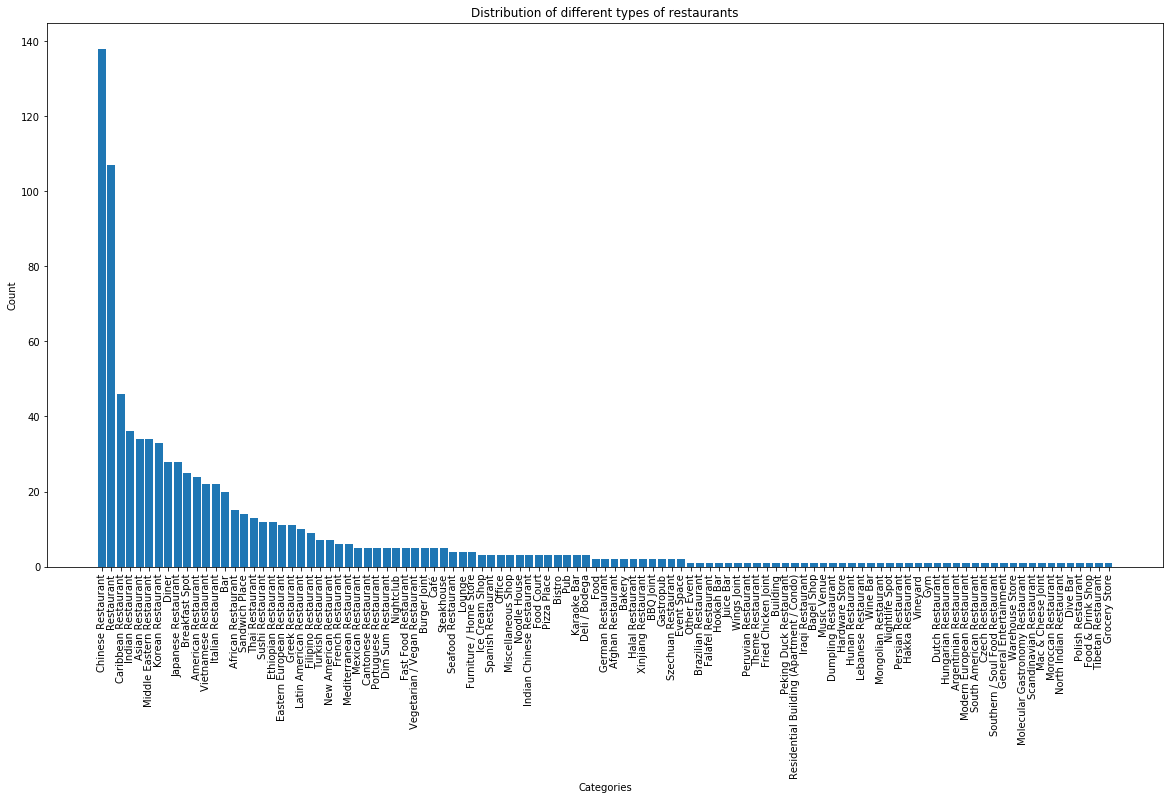

In [25]:
fig1 = plt.figure(figsize = (20,10)) 
  
# creating the bar plot 
plt.bar(list(restaurant_counter["categories"]),list(restaurant_counter["count"])) 
  
plt.xlabel("Categories") 
plt.ylabel("Count") 
plt.title("Distribution of different types of restaurants")
plt.xticks(rotation=90)
plt.show() 


### Count of the Number of Restaurants in Each City

In [26]:
city_counter=dataframe_filtered['city'].value_counts()
city_counter=city_counter.reset_index()
city_counter=city_counter.dropna()
city_counter=city_counter.rename(columns={"index": "City", "city": "count"})
city_counter

City  count
0               Toronto    575
1           Scarborough     70
2           Mississauga     36
3             Etobicoke     33
4            North York     33
5               Markham     14
6               Vaughan     14
7             Thornhill      9
8            Woodbridge      8
9      Toronto Division      5
10            East York      5
11              Concord      4
12                 York      3
13              Rexdale      2
14  Black Creek village      1
15              toronto      1
16              Niagara      1
17               Torono      1
18          Port Credit      1
19              Oakvill      1
20               Bolton      1
21           Willowdale      1
22              Vahalla      1
23               Vaughn      1
24           Grand Case      1
25               Dundas      1
26       Weston Village      1
27            Cambridge      1
28          Scarboroigh      1
29             Edmonton      1
30        Richmond Hill      1

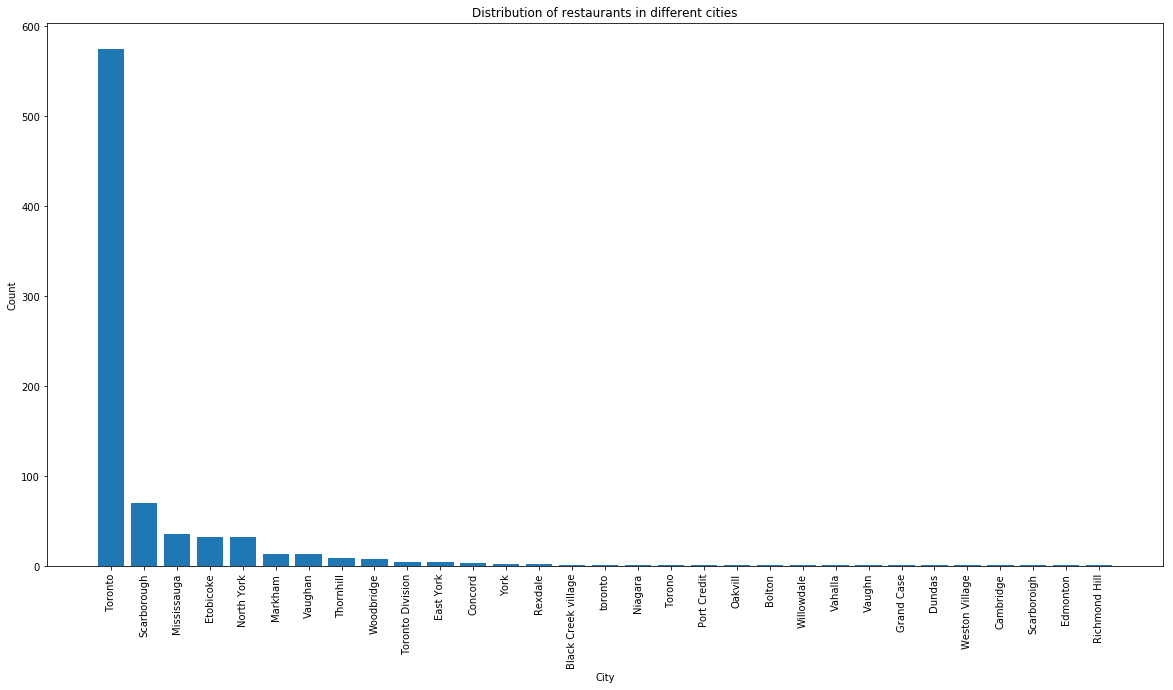

In [27]:
fig2 = plt.figure(figsize = (20,10)) 
  
# creating the bar plot 
plt.bar(list(city_counter["City"]),list(city_counter["count"])) 
  
plt.xlabel("City") 
plt.ylabel("Count") 
plt.title("Distribution of restaurants in different cities")
plt.xticks(rotation=90)
plt.show() 

In [28]:
group_data=dataframe_filtered.groupby(['categories','city']).count().reset_index()
group_data=group_data[['categories','city','name']]
group_data=group_data.rename(columns={'name':'count'})
group_data

categories              city  count
0                  Afghan Restaurant        North York      1
1                  Afghan Restaurant           Toronto      1
2                 African Restaurant         Etobicoke      2
3                 African Restaurant           Toronto      8
4                 African Restaurant    Weston Village      1
5                American Restaurant         Etobicoke      1
6                American Restaurant       Mississauga      3
7                American Restaurant       Scarborough      1
8                American Restaurant           Toronto     14
9             Argentinian Restaurant           Toronto      1
10                  Asian Restaurant         Etobicoke      1
11                  Asian Restaurant           Markham      1
12                  Asian Restaurant       Mississauga      1
13                  Asian Restaurant       Scarborough      4
14                  Asian Restaurant           Toronto     21
15                         BBQ Joint           Toronto      2
16                        Bagel Shop        North York      1
17                            Bakery         Thornhill      1
18                            Bakery           Toronto      1
19                               Bar       Mississauga      1
20                               Bar        North York      2
21                               Bar       Scarborough      1
22                               Bar           Toronto     12
23                            Bistro           Toronto      3
24              Brazilian Restaurant           Toronto      1
25                    Breakfast Spot         Etobicoke      2
26                    Breakfast Spot       Mississauga      1
27                    Breakfast Spot       Scarborough      1
28                    Breakfast Spot           Toronto     17
29                    Breakfast Spot           Vaughan      1
..                               ...               ...    ...
196               Seafood Restaurant           Toronto      3
197        South American Restaurant       Mississauga      1
198  Southern / Soul Food Restaurant           Toronto      1
199               Spanish Restaurant           Toronto      3
200                       Steakhouse       Mississauga      2
201                       Steakhouse         Thornhill      1
202                       Steakhouse           Toronto      2
203                 Sushi Restaurant         Etobicoke      2
204                 Sushi Restaurant           Toronto     10
205              Szechuan Restaurant        North York      1
206              Szechuan Restaurant           Toronto      1
207                  Thai Restaurant           Concord      1
208                  Thai Restaurant         Etobicoke      1
209                  Thai Restaurant           Toronto      9
210                  Thai Restaurant  Toronto Division      1
211                 Theme Restaurant           Toronto      1
212               Tibetan Restaurant           Toronto      1
213               Turkish Restaurant       Mississauga      1
214               Turkish Restaurant           Toronto      6
215    Vegetarian / Vegan Restaurant       Scarborough      1
216    Vegetarian / Vegan Restaurant           Toronto      3
217            Vietnamese Restaurant       Mississauga      2
218            Vietnamese Restaurant       Scarborough      2
219            Vietnamese Restaurant           Toronto     14
220                         Vineyard           Toronto      1
221                  Warehouse Store           Toronto      1
222                         Wine Bar           Toronto      1
223                      Wings Joint        North York      1
224              Xinjiang Restaurant           Markham      1
225              Xinjiang Restaurant       Mississauga      1

[226 rows x 3 columns]

In [29]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(dataframe_filtered['categories'].astype(str))))])

In [30]:
connect=pd.DataFrame.from_dict(d, orient='index').reset_index().rename(columns={"index":"categories",0:"num"})
dataframe_filtered = pd.merge(dataframe_filtered,connect, how='left', on=['categories', 'categories'])
dataframe_filtered['num']=dataframe_filtered['num'].fillna(77)
dataframe_filtered

index                                             name  \
0        0                                 Ted's Restaurant   
1        1                                Africa Restaurant   
2        2                             Rex's Den Restaurant   
3        3                             Grapevine Restaurant   
4        4                               Sabby's Restaurant   
5        5                                          Wendy’s   
6        8                         Peking Garden Restaurant   
7        9                                 Mahar Restaurant   
8       10                 Wonder Season Chinese Restaurant   
9       11                                       McDonald's   
10      15                        Little Bavaria Restaurant   
11      16                               Tai Chi Restaurant   
12      19                       Sunny's Bar and Restaurant   
13      21                                Prague Restaurant   
14      23                 Spice It Up Caribbean Restaurant   
15      24           Ali Baba's Restaurant @ Cedarbrae Mall   
16      25                         Sa-Fire Restaurant & Bar   
17      26                                 Max's Restaurant   
18      27                         Woburn Garden Restaurant   
19      28                                           Subway   
20      29                                      Lucky Hakka   
21      30                                           Subway   
22      32                        Sammy's Family Restaurant   
23      38                               Terry's Restaurant   
24      41                       Markham Station Restaurant   
25      42                               Bendale Restaurant   
26      43                         Terry's Restaurant & Bar   
27      44                               terry's restaurant   
28      47                        The Local Cafe Restaurant   
29      49                                       McDonald's   
..     ...                                              ...   
912   3645                            Quatrefoil Restaurant   
913   3651                                            Ginko   
914   3652                             Tucker's Marketplace   
915   3653                            Shanghai's restaurant   
916   3654                        Dallas Restaurant And Bar   
917   3655                                Honest Restaurant   
918   3657                      24Seven Lounge & Restaurant   
919   3658                     24 Seven Lounge & Restaurant   
920   3667                     Sunrise Caribbean Restaurant   
921   3668                             Favorites Restaurant   
922   3669                   Spotlight caribbean restaurant   
923   3672                                 Bilal Restaurant   
924   3673                                 Bilal Restaurant   
925   3677                                  Mandarin Buffet   
926   3679              Caribbean Oasis Lounge & Restaurant   
927   3685                      The Metropolitan Restaurant   
928   3688     Fairfield Inn & Suites restaurant and lounge   
929   3689                           Bliss Restaurant & Bar   
930   3690  Bliss Restaurant & Bar - Hilton Airport Toronto   
931   3694                                 Zet's Restaurant   
932   3698                               Fifty's restaurant   
933   3699    Fuzion Restaurant (Grill-Steakhouse-Tandoori)   
934   3700                              PizzaWay Restaurant   
935   3701                    Falls Manor Family Restaurant   
936   3703                               Simma's Restaurant   
937   3704             Topiary's Steak & Seafood Restaurant   
938   3705        Sky's The Limit - Lolo's Bar & Restaurant   
939   3707                The Local Restaurant And Wine Bar   
940   3710                                     Meteor Diner   
941   3713                                            Corso   

                    categories                             address  cc  \
0               Breakfas

### Location Plot of Restaurant Types

In [31]:
venues_map1 = folium.Map(location=[43.742778, -79.465556], zoom_start=12) 
d_len=len(d)
x = np.arange(d_len)
ys = [i + x + (i*x)**2 for i in range(d_len)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors=[]
for name,categories,lat, lng, numt in zip(dataframe_filtered.name,dataframe_filtered.categories,dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.num.astype(int)):
    label = folium.Popup( str(name) + ' |  Category :' + str(categories), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[numt-1],
        fill = True,
        fill_color=rainbow[numt-1],
        fill_opacity=0.6
    ).add_to(venues_map1)

# display map
venues_map1

In [32]:
from sklearn.cluster import KMeans
# import warnings filter
import warnings
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [33]:
points=[[0]*2]*len(dataframe_filtered) 
for i in range(len(dataframe_filtered)):
    points[i][0]=float(dataframe_filtered['lat'][i])
    points[i][1]=float(dataframe_filtered['lng'][i])

In [34]:
X=dataframe_filtered[['lat','lng']]
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [35]:
kclusters = 20
restaurant_clustering1 =dataframe_filtered[['lat','lng']]
kmeans5 = KMeans(n_clusters=kclusters, random_state=0).fit(X)
kmeans5.labels_[0:10]

array([7, 2, 7, 7, 2, 7, 7, 7, 7, 7], dtype=int32)

In [36]:
dataframe_filtered.insert(0, 'ClusterLabels', kmeans5.labels_)
dataframe_filtered.head()

ClusterLabels  index                  name            categories  \
0              7      0      Ted's Restaurant        Breakfast Spot   
1              2      1     Africa Restaurant     Food & Drink Shop   
2              7      2  Rex's Den Restaurant          Burger Joint   
3              7      3  Grapevine Restaurant            Restaurant   
4              2      4    Sabby's Restaurant  Caribbean Restaurant   

                address  cc              city country crossStreet distance  \
0  404 Old Kingston Rd.  CA       Scarborough  Canada         NaN     3194   
1                   NaN  CA  Toronto Division  Canada         NaN     1636   
2      1265 Military Tr  CA           Toronto  Canada         NaN     2485   
3                   NaN  CA               NaN  Canada         NaN     3042   
4   5780 Sheppard Ave E  CA           Toronto  Canada  Markham Rd     3276   

                                    formattedAddress  \
0     [404 Old Kingston Rd., Scarborough ON, Canada]   
1                      [Toronto Division ON, Canada]   
2             [1265 Military Tr, Toronto ON, Canada]   
3                                           [Canada]   
4  [5780 Sheppard Ave E (Markham Rd), Toronto ON,...   

                                      labeledLatLngs        lat        lng  \
0  [{'label': 'display', 'lat': 43.78446796744621...  43.784468 -79.169200   
1  [{'label': 'display', 'lat': 43.81958724358436...  43.819587 -79.184574   
2  [{'label': 'display', 'lat': 43.78500731279124...  43.785007 -79.186964   
3  [{'label': 'display', 'lat': 43.78047180175781...  43.780472 -79.205078   
4  [{'label': 'display', 'lat': 43.79554878818409...  43.795549 -79.232105   

  neighborhood postalCode state                        id   num  
0          NaN        NaN    ON  4be6c179d4f7c9b665042720  12.0  
1          NaN        NaN    ON  4c97a82382b56dcbf7afebaa  33.0  
2          NaN        NaN    ON  4b96cbe6f964a5202ae534e3  14.0  
3  Morningside        NaN   NaN  51f2c1f8498edf6fd71b8e18  88.0  
4          NaN        NaN    ON  5144fe0fe4b0634be203f271  17.0

### Clustering Restaurants in the Neighborhood based on Proximity

In [37]:
venues_map2 = folium.Map(location=[43.742778, -79.465556], zoom_start=12) 

x1 = np.arange(kclusters)
ys1 = [i + x1 + (i*x1)**2 for i in range(kclusters)]
colors_array1 = cm.rainbow(np.linspace(0, 1, len(ys1)))
rainbow1 = [colors.rgb2hex(i) for i in colors_array1]
markers_colors=[]
for name,cluster,categories,lat, lng, numt in zip(dataframe_filtered.name,dataframe_filtered.ClusterLabels,dataframe_filtered.categories,dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.num.astype(int)):
    label = folium.Popup( str(name) + ' |  Category :' + str(categories) + ' | Cluster :'+ str(cluster), parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color=rainbow1[cluster-1],
        fill=True,
        fill_color=rainbow1[cluster-1],
        fill_opacity=0.7).add_to(venues_map2)

# display map
venues_map2
